In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

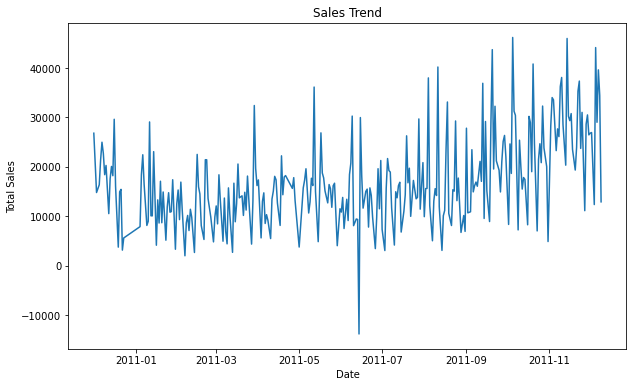

In [2]:
# Load the dataset
data = pd.read_csv('OnlineRetail.csv')

# Sales and Revenue - Line Chart
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
sales_data = data.groupby(data['InvoiceDate'].dt.date)['Quantity'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend')
plt.show()

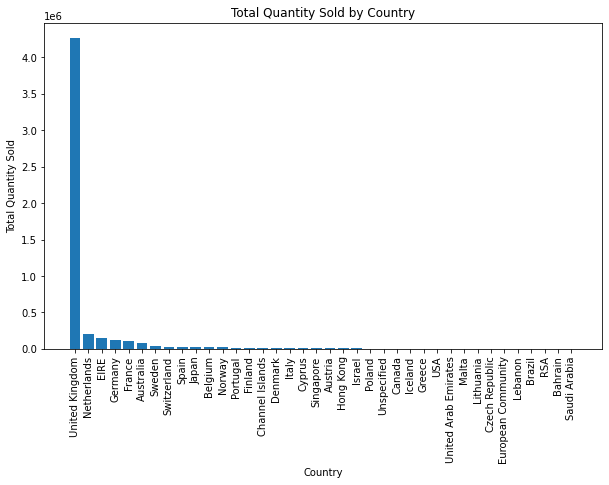

In [3]:
# Group data by Country and calculate the total quantity sold
grouped = data.groupby('Country')['Quantity'].sum().reset_index()

# Sort the data in descending order
grouped = grouped.sort_values('Quantity', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped['Country'], grouped['Quantity'])
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Country')
plt.xticks(rotation=90)
plt.show()

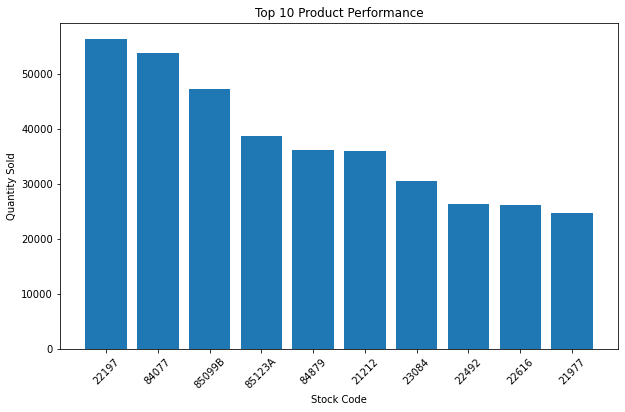

In [4]:
# Product Performance - Bar Chart
product_performance = data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(product_performance.index, product_performance.values)
plt.xlabel('Stock Code')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Product Performance')
plt.xticks(rotation=45)
plt.show()

In [5]:
data['Revenue'] = data['Quantity']*data['UnitPrice']

In [6]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

In [7]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


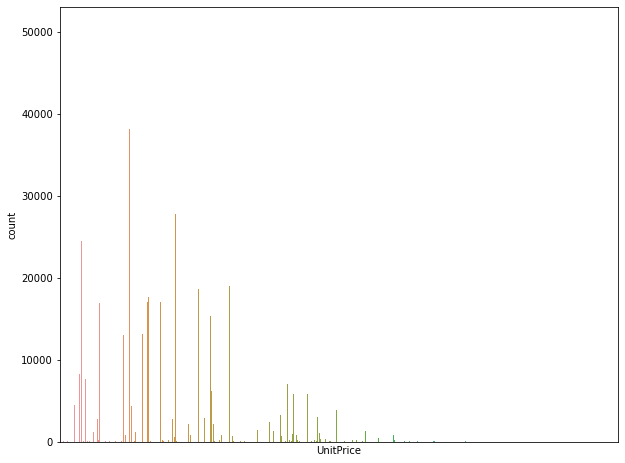

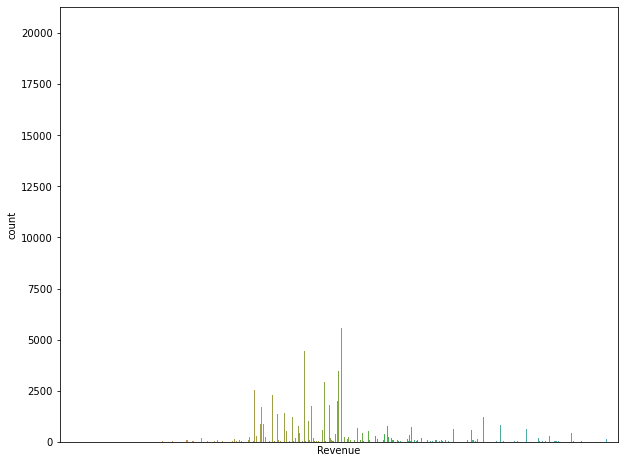

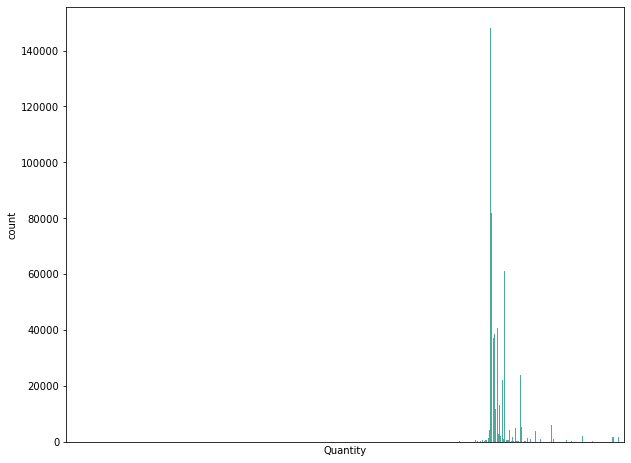

In [8]:
#COUNT PLOTS OF THE NUMERIC VARIABLES FOR DATA ANALYSIS

columns = ['UnitPrice', 'Revenue','Quantity']
for i in columns:
    plt.figure(figsize=(10, 8))
    ax = sns.countplot(x=i, data=data)
    ax.set_xlim(ax.get_xlim()[0]*0.6, ax.get_xlim()[1]*0.6)  # Reduce the x-axis scale by 40%
    ax.set_xticks([])  # Remove x-axis ticks
    plt.show()

In [9]:
df = pd.DataFrame(data)

# Select the columns for correlation matrix
columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country', 'Revenue']
selected_df = df[columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Display the correlation matrix
print(correlation_matrix)

           Quantity  UnitPrice   Revenue
Quantity   1.000000  -0.001235  0.886681
UnitPrice -0.001235   1.000000 -0.162029
Revenue    0.886681  -0.162029  1.000000


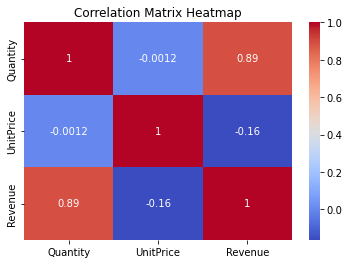

In [10]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(data)

# Define the features (X) and target variable (y)
X = df[['UnitPrice', 'Revenue']]
y = df['Quantity']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the trained model
y_pred = model.predict(X_test)

# Print the predicted values
print("Predicted quantities:", y_pred)

Predicted quantities: [ 9.23974763 15.37369351  0.11811915 ...  5.89295312  0.93491614
 -1.10592714]


Scatter Plot: You can create a scatter plot to visualize the actual quantities versus the predicted quantities. This will help you understand how well the model is predicting the quantities.

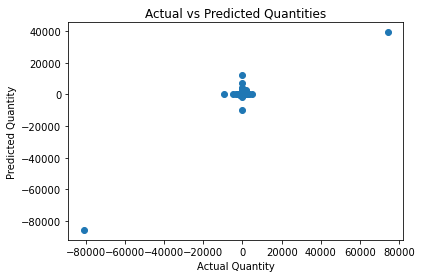

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)

plt.xlabel("Actual Quantity")
plt.ylabel("Predicted Quantity")
plt.title("Actual vs Predicted Quantities")
plt.show()

Residual Plot: A residual plot shows the difference between the actual and predicted values. It helps in identifying any patterns or biases in the predictions. 

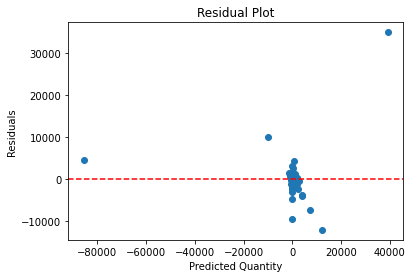

In [13]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Quantity")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Assuming 'X' is the feature matrix and 'y' is the target variable
X = data[['Quantity', 'UnitPrice']]
y = data['Revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Printing the MAE as an evaluation metric
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 17.433449317229655


In [15]:
accuracy = 100 - mae  # Subtract MAE from 100 to obtain accuracy
print("Accuracy of our model: {:.2f}%".format(accuracy))

Accuracy of our model: 82.57%


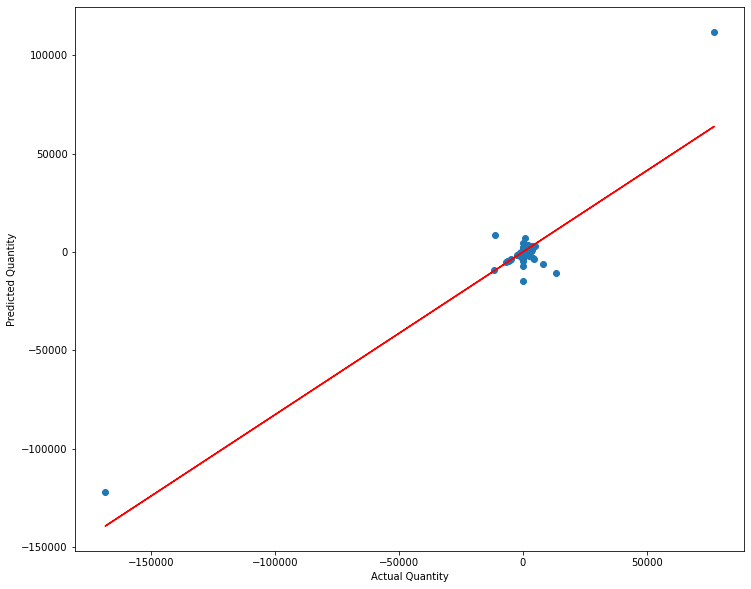

In [17]:
fig = plt.figure(figsize = (12, 10))
plt.ylabel("Predicted Quantity")
plt.xlabel("Actual Quantity")
plt.scatter(x = y_test, y = y_pred)
m, c = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+c, color='red')

# CONCLUSION

When the graph of a linear regression model shows a linear relationship between the x-axis (actual values) and the y-axis (predictions), it indicates that the model's predictions closely match the actual values. This linear pattern suggests that the model has captured the underlying patterns and trends in the data quite well.

A perfectly linear graph would imply that the model's predictions perfectly align with the true values, indicating a high level of accuracy. Although achieving a perfectly linear graph is rare in real-world scenarios due to data noise and variability, a predominantly linear trend suggests that the linear regression model has performed well. It demonstrates the model's ability to learn the relationship between the input variables and the target variable, resulting in reasonably accurate predictions.

While interpreting the graph, it is important to consider the dispersion of points around the ideal line of perfect linearity. A smaller spread of points indicates lower prediction errors and a higher level of precision. Conversely, a wider scatter indicates higher variability and room for improvement in the model's predictive capabilities.

In summary, a linear graph with the x-axis representing real values and the y-axis representing test predictions in a linear regression model reflects a strong alignment between the predicted and actual values. This suggests that the model has achieved good prediction accuracy, although some degree of scatter is expected in real-world scenarios.